# OpenFermion – Psi4 demo

---

A codealong of [openfermionpsi4_demo.ipynb](https://github.com/quantumlib/OpenFermion-Psi4/blob/master/examples/openfermionpsi4_demo.ipynb)

Wayne H Nixalo – 2018/6/27

## Running Psi4 to populate the OpenFermion MolecularData class

>The module `run_psi4.py` provides a user-friendly way of running Psi4 calculations in OpenFermion. The basic idea is that once one generates a `MolecularData` instance, once can then call Psi4 with a specification of certain options (for instance, how muhc memory to use and what calculations to do_ in order to compute things about the molecule, update the `MolecularData` object, and save results of the calculation.
>
>The most common calculations users will want in OpenFermion would probabl be self-consistent field (aka Hartree-Fock calulations). Our code uses these "SCF" calculations to compute orbitals integrals, Hartree-Fock, energy, and more. Other common calculations are CISD and FCI calculations which also compute the 1-RDM and 2-RDM associated with their answers; CCSD calculations which also compute the CCSD amplitudes (useful for UCC) and MP2 calculations which can also be used to UCCSD initial guesses. Note that the `"delete_input"` and `"delete_output"` options indicate whether to save automatically generated Psi4 input files or not.

>To use this plugin, you will need to personally download Psi4. Python code in `psi4_template` instructs Psi4 (not python) to load the `MolecularData` object, populate it with information from calculations, and then save then save the `MolecularData` object as an HDF5. The module `run_psi4` uses subprocesses to actually `run_psi4` and then loads the pickled `MolecularData`. Let's look at a simple example where we compute the energy of H$_2$ at various bond lengths.

>Warnings: electronic sructure calculations are finicky. They sometimes fail for surprising reasons. If a particular calculation is not converging it is probably necessary to change some of the SCF options set in `psi4_template`. See the Psi4 documentation for more information or consult an electronic structure theory expert.

In [1]:
%matplotlib inline


At bond length of 0.2 ångstrom, molecular hydrogen has:
Hartree-Fock energy of 0.1641750014148149 Hartree.
MP2 energy of 0.159042663260535 Hartree.
FCI energy of 0.15748212414246954
Nuclear repulsion energy between protons is 2.64588604295
Spatial orbital 0 has energy of -0.8588245273148681
Spatial orbital 1 has energy of 1.5723620302922923

At bond length of 0.4 ångstrom, molecular hydrogen has:
Hartree-Fock energy of -0.9043613977138452 Hartree.
MP2 energy of -0.9114367296997886 Hartree.
FCI energy of -0.9141497082141279
Nuclear repulsion energy between protons is 1.322943021475
Spatial orbital 0 has energy of -0.745212533290935
Spatial orbital 1 has energy of 1.1674163950381238

At bond length of 0.6000000000000001 ångstrom, molecular hydrogen has:
Hartree-Fock energy of -1.1011282431368283 Hartree.
MP2 energy of -1.111331767479406 Hartree.
FCI energy of -1.1162860078265333
Nuclear repulsion energy between protons is 0.8819620143166665
Spatial orbital 0 has energy of -0.64087626439

Text(0.5,0,'Bond length in ångstrom')

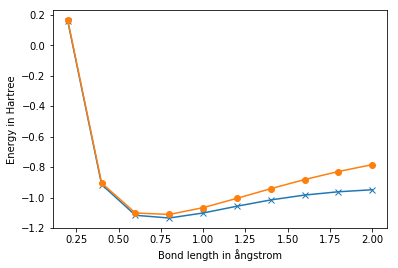

In [2]:
from openfermion.hamiltonians import MolecularData
from openfermionpsi4 import run_psi4

# Set molecule parameters
basis = 'sto-3g'
multiplicity = 1
bond_length_interval = 0.2
n_points = 10

# Set calculation parameters
run_scf = 1
run_mp2 = 1
run_cisd = 0
run_ccsd = 0
run_fci = 1
delete_input = True
delete_output = True

# Generate molecule at different bond lengths
hf_energies = []
fci_energies = []
bond_lengths = []
for point in range(1, n_points + 1):
    bond_length = bond_length_interval * float(point)
    bond_lengths += [bond_length]
    geometry = [('H', (0.,0.,0.)), ('H', (0.,0.,bond_length))]
    molecule = MolecularData(
        geometry, basis, multiplicity,
        description=str(round(bond_length, 2)))
    
    # Run Psi4
    molecule = run_psi4(molecule, 
                        run_scf=run_scf, 
                        run_mp2=run_mp2, 
                        run_cisd=run_cisd, 
                        run_ccsd=run_ccsd, 
                        run_fci=run_fci)
    
    # Print out some results of calculation
    print(f'\nAt bond length of {bond_length} ångstrom, molecular hydrogen has:')
    print(f'Hartree-Fock energy of {molecule.hf_energy} Hartree.')
    print(f'MP2 energy of {molecule.mp2_energy} Hartree.')
    print(f'FCI energy of {molecule.fci_energy}')
    print(f'Nuclear repulsion energy between protons is {molecule.nuclear_repulsion}')
    for orbital in range(molecule.n_orbitals):
        print(f'Spatial orbital {orbital} has energy of {molecule.orbital_energies[orbital]}')
    hf_energies += [molecule.hf_energy]
    fci_energies += [molecule.fci_energy]
    
# Plot
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(bond_lengths, fci_energies, 'x-'); plt.plot(bond_lengths, hf_energies, 'o-');
plt.ylabel('Energy in Hartree'); plt.xlabel('Bond length in ångstrom')

I don't know what I did but this is cool. 🤓